# Introduction
In this post, we are looking at the SAT (Scholastic Aptitude Test) scores of high schoolers in the US along with other informations.
We will use <code>Python</code> for the data analysis.

The SAT is a test that high schoolers take in the US before applying to college so it is fairly important. 
Moreover, SAT scores are used to indicate how good a school district is.
There have been allegations about the SAT being unfair (to certain ethnic groups in the US for example).
Doing this analysis on New York City data will help shed some light on the fairness of the SAT.

# Pre-analysis
In order to investigate the relation between the SAT and other factors such the ethnic groups or class sizes, we need data. 
In the Web site of the city of New York, we can find many data sets from which these have been selected:
- <b>SAT results</b> by school (more information and download [here](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)).
- School <b>demographics</b> (more information and download [here](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)).
- <b>Class size</b> at the school level (more information and download [here](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)).

In what follows, we have a look on the data sets. 
Then, we clean and unify all the individual datasets into a single one in order to work with the data more easily.

# Data description
In this section, we explore retrieved the data sets.
In order to achieve this, we load them into data frames.

In [33]:
#in order to analyse the data sets, we load them into Python data frames (pandas and numpy libraries)
import pandas as pd
import numpy as np

In [34]:
#initialize the array that will contain the different data sets
data = {}

## SAT scores by school 
This data set contains the most recent school level results for New York City on the SAT. 
Results are available at the school level. 

It is to be noticed that the SAT test is divided into 3 sections, each of which is scored out of 800 points (last 3 columns). 
The total score is out of 2400.

<b>Full data</b> can be downloaded <a href="{{ site.baseurl }}/dev/us_sat/data/SAT_Results.csv">here</a> in CSV format.


In [35]:
#read csv file and show the data head
data["sat_results"] = pd.read_csv("data/{0}.csv".format("SAT_Results"))
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


## School demographics
This data set contains the annual school accounts of NYC public school student populations served by several information from which ethnicity and gender. 

<b>Full data</b> can be downloaded <a href="{{ site.baseurl }}/dev/us_sat/data/Demographics_and_Accountability.csv">here</a> in CSV format.

In [36]:
#read csv file and show the data head
data["demographics"] = pd.read_csv("data/{0}.csv".format("Demographics_and_Accountability"))
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


## Class size on the school level 
This data set contains the average class sizes for each school, by grade and program type (full description [here](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)).

<b>Full data</b> can be downloaded <a href="{{ site.baseurl }}/dev/us_sat/data/Class_Size-School_level_detail.csv">here</a> in CSV format.

In [37]:
#read csv file and show the data head
data["class_size"] = pd.read_csv("data/{0}.csv".format("Class_Size-School_level_detail"))
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


# Data cleaning
Having a consistent dataset will help us do analysis more quickly.
In order to do this, we’ll first need to find a common column to unify them on. 
Looking at the output above, it appears that "DBN" (District Borough Number) might be that common column, as it appears in multiple datasets.
DBN is a unique code for each school.

However:
- the "class_size" data set don’t have a DBN field. 
- there are several rows for each high school in both the "class_size" and the "demographics" data sets.
- the 3 components of the SAT scores (columns) need to be summed.

Thus, we need to clean these them first.

## Cleaning each data set
If we look to the data set "class_size" and to the "DBN" column in the other data sets, it looks like the DBN is actually a combination of "CSD" and "SCHOOL CODE". 
There’s no systematized way to find insights like this in data, and it requires some exploration and playing around to figure out.
Let us create the column "DBN" now.

In [38]:
#create the "DBN" column by combining other columns
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In order to combine these datasets, we’ll need to find a way to condense data sets like "class_size" to the point where there’s only a single row per high school. 
If not, there won’t be a way to compare SAT scores to class size. 
We can accomplish this by first understanding the data better, then by doing some aggregation. 
With the class_size dataset, it looks like GRADE and PROGRAM TYPE have multiple values for each school. 
By restricting each field to a single value, we can filter most of the duplicate rows. 


In [39]:
class_size_temp = data["class_size"]

#restrict the class_size data set to a specific grade and program type
class_size_temp = class_size_temp[class_size_temp["GRADE "] == "09-12"]
class_size_temp = class_size_temp[class_size_temp["PROGRAM TYPE"] == "GEN ED"]

#there still are duplicates, we group the class_size data set by DBN, and take the average of each column
class_size_temp = class_size_temp.groupby("DBN").agg(np.mean)

#reset the index, so DBN is added back in as a column (otherwise, DBN is the index column)
class_size_temp.reset_index(inplace=True)

data["class_size_ge_09-12"] = class_size_temp
data["class_size_ge_09-12"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


Next, we’ll need to condense the demographics dataset. 
The data was collected for multiple years for the same schools. 
We will only pick rows where the schoolyear field is the most recent available.

In [40]:
#select only one year
demographics_temp = data["demographics"]
demographics_temp = demographics_temp[demographics_temp["schoolyear"] == 20112012]

data["demographics_2011-2012"] = demographics_temp
data["demographics_2011-2012"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


Now, we compute the total SAT scores from their individual 3 components. 


In [41]:
#convert each of the SAT score columns from a string to a number
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors='coerce')

#add together all of the columns to get the sat_score column, which is the total SAT score
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


## Combining the data sets
We can now combine all the data sets.
In this analysis, we ignore missing value.

In [42]:
#joining data sets
data_full = data['sat_results']
data_full = data_full.merge(data["class_size_ge_09-12"], on="DBN", how="inner")
data_full = data_full.merge(data["demographics_2011-2012"], on="DBN", how="inner")

#the structure of the global data set
data_full.shape

(434, 51)

# Data analysis
A good way to explore a dataset and see what columns are related to the one you care about is to compute correlations. This will tell you which columns are closely related to the column you’re interested in:
- The closer to 0 the correlation, the weaker the connection.
- The closer to 1, the stronger the positive correlation, and the closer to -1, the stronger the negative correlation.

In [43]:
#show the correlations of the columns with the "sat_score" column
data_full_corr = data_full.corr()['sat_score']
data_full_corr.sort_values(ascending=False)

sat_score                            1.000000
SAT Writing Avg. Score               0.981751
SAT Critical Reading Avg. Score      0.976819
SAT Math Avg. Score                  0.956406
white_per                            0.646568
asian_per                            0.552204
asian_num                            0.483939
white_num                            0.460505
female_num                           0.403581
NUMBER OF STUDENTS / SEATS FILLED    0.400095
AVERAGE CLASS SIZE                   0.395964
total_enrollment                     0.385741
NUMBER OF SECTIONS                   0.364537
male_num                             0.345808
SIZE OF LARGEST CLASS                0.327099
SIZE OF SMALLEST CLASS               0.282388
female_per                           0.107676
sped_num                             0.058782
CSD                                  0.054011
hispanic_num                         0.052672
black_num                            0.043408
male_per                          

This gives us a few insights that can be explored. For example:
- The percentage of females at a school (female_per) correlates positively with SAT score, whereas the percentage of males (male_per) correlates negatively.
- There is a significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).

Each of these items is a potential angle to explore and tell a story about using the data.


## Exploring race and SAT scores
One angle to investigate involves race and SAT scores. 
There is a large correlation difference, and plotting it out will help us see that.

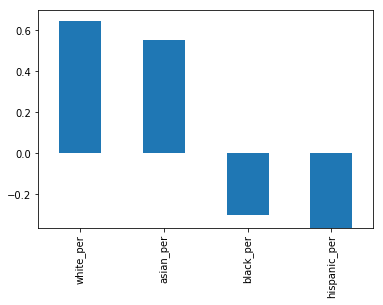

In [44]:
#importing the matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

#2D graph 
data_full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

It looks like the higher percentages of white and asian students correlate with higher SAT scores, but higher percentages of black and hispanic students correlate with lower SAT scores. 
For hispanic students, this may be due to the fact that there are more recent immigrants who are english learners.

## Gender differences in SAT scores
An other angle to explore is the relationship between gender and SAT score. 
We noted that a higher percentage of females in a school tends to correlate with higher SAT scores. 
We can visualize this with a bar graph.

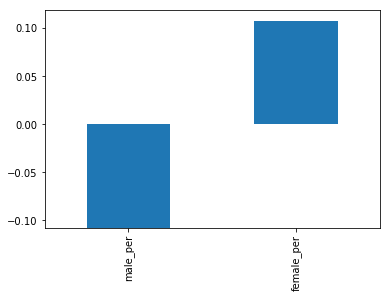

In [45]:
#2D graph 
data_full.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

To dig more into the correlation, we can make a scatterplot of "female_per" and "sat_score".

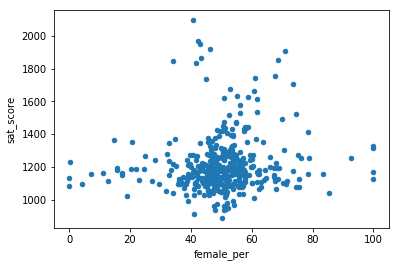

In [46]:
#scatter plot
data_full.plot.scatter(x='female_per', y='sat_score')

It looks like there’s a cluster of schools with a high percentage of females, and very high SAT scores (in the top right). 
We can get the names of the schools in this cluster.

In [47]:
data_full[(data_full["female_per"] > 65) & (data_full["sat_score"] > 1400)]["SCHOOL NAME"]

8                         BARD HIGH SCHOOL EARLY COLLEGE
27              PROFESSIONAL PERFORMING ARTS HIGH SCHOOL
31                         ELEANOR ROOSEVELT HIGH SCHOOL
48                          TALENT UNLIMITED HIGH SCHOOL
78     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
364                          TOWNSEND HARRIS HIGH SCHOOL
411         FRANK SINATRA SCHOOL OF THE ARTS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Searching Google reveals that these are elite schools that focus on the performing arts. These schools tend to have higher percentages of females, and higher SAT scores. This likely accounts for the correlation between higher female percentages and SAT scores, and the inverse correlation between higher male percentages and lower SAT scores.

# Conclusion

In this post, we have analysed the schools SAT scores and the relation with some other informations like ethnic groups and gender.
However, we explored some angles only in the surface, and could have dived into more.
Furthermore, we could have combined with other data sets such as schools location informations.


# Credits
This case study is based on an article of [Vik Paruchuri](https://twitter.com/vikparuchuri "@vikparuchuri").
I thank him for this example.